<a href="https://colab.research.google.com/github/samgab02/AI_Course_Road2/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/500
800/800 [==============================] - 2s 1ms/step - loss: 8574.0615
Epoch 2/500
800/800 [==============================] - 1s 1ms/step - loss: 805.3314
Epoch 3/500
800/800 [==============================] - 1s 1ms/step - loss: 590.1077
Epoch 4/500
800/800 [==============================] - 3s 3ms/step - loss: 385.6847
Epoch 5/500
800/800 [==============================] - 4s 5ms/step - loss: 222.6328
Epoch 6/500
800/800 [==============================] - 3s 3ms/step - loss: 105.6871
Epoch 7/500
800/800 [==============================] - 2s 3ms/step - loss: 40.3208
Epoch 8/500
800/800 [==============================] - 2s 3ms/step - loss: 10.7166
Epoch 9/500
800/800 [==============================] - 2s 3ms/step - loss: 1.6869
Epoch 10/500
800/800 [==============================] - 3s 4ms/step - loss: 0.1135
Epoch 11/500
800/800 [==============================] - 4s 5ms/step - loss: 0.0022
Epoch 12/500
800/800 [==============================] - 3s 4ms/step - loss: 6.159

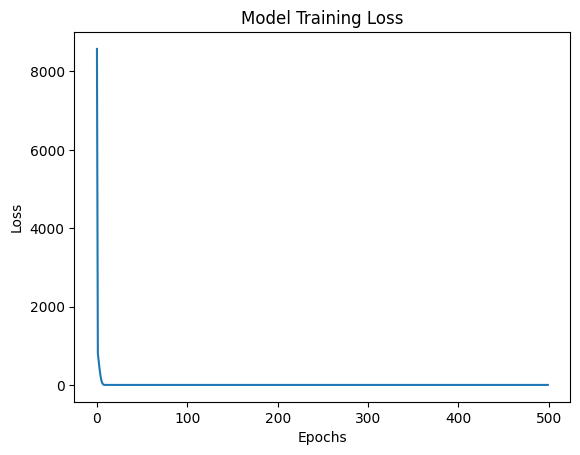

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files

# Function to convert Celsius to Fahrenheit using the trained model
def celsius_to_fahrenheit(celsius_value):
    return model.predict([celsius_value])[0][0]

# Generate some data for training
celsius = np.random.uniform(low=-100, high=100, size=1000)
fahrenheit = (celsius * 1.8) + 32

# Create a DataFrame with Celsius and Fahrenheit columns
data = {'Celsius': celsius, 'Fahrenheit': fahrenheit}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('celsius_to_fahrenheit_dataset.csv', index=False)

# Load the dataset
df = pd.read_csv('celsius_to_fahrenheit_dataset.csv')

# Build a simple neural network with a specified learning rate
custom_optimizer = keras.optimizers.Adam(learning_rate=0.01)

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# Compile the model with custom optimizer and mean squared error loss
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Split the data into training and testing sets
celsius_train, celsius_test, fahrenheit_train, fahrenheit_test = train_test_split(df['Celsius'], df['Fahrenheit'], test_size=0.2, random_state=42)

# Train the model with 500 epochs and batch size 1
history = model.fit(celsius_train, fahrenheit_train, epochs=500, batch_size=1, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(celsius_test, fahrenheit_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Test the model with a sample input
sample_celsius = 0
predicted_fahrenheit = celsius_to_fahrenheit(sample_celsius)
print(f'{sample_celsius} Celsius is approximately {predicted_fahrenheit} Fahrenheit')

# Choose a Celsius value not in the dataset
new_celsius = 25

# Use the real conversion formula to calculate the true Fahrenheit value
true_fahrenheit = (new_celsius * 1.8) + 32

# Use the trained model to predict the Fahrenheit value
predicted_fahrenheit = celsius_to_fahrenheit(new_celsius)

# Calculate the absolute error
error = abs(true_fahrenheit - predicted_fahrenheit)

# Print the results
print(f'\nCelsius: {new_celsius} (True Fahrenheit: {true_fahrenheit:.2f}, Predicted Fahrenheit: {predicted_fahrenheit:.2f})')
print(f'Absolute Error: {error:.2f} Fahrenheit')

# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
